<h1>Indice</h1>
    <ul>
        <li><a href="eda">Exploratory Analytics</a>
            <ul>
                <li><a href="#final_score_analysis">Final Score Analysis</a></li>
                <li><a href="#correlation">Final Score Correlation</a></li>
                <li><a href="#variables_analysis">Final Score e fattori impattanti</a>
                    <ul>
                        <li><a href="#personal">Dati Anagrafici</a></li>
                        <li><a href="#school">Istituti Scolastici</a></li>
                        <li><a href="#family">Ambiente Familiare</a></li>
                        <li><a href="#time_management">Gestione del Tempo</a></li>
                        <li><a href="#alchol">Consumo di Alcolici</a></li>
                        <li><a href="#other_analysis">Ulteriori Analisi</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><a href="pa">Predictive Analytics</a>
            <ul>
                <li><a href="#reduce_dim">Riduzione della Dimensionalità</a></li>
                <li><a href="#train">Ottimizzazione dei Parametri e Addestramento</a></li>
                <li><a href="#valutation">Valutazione</a></li>
                <li><a href="#f_importance">Importanza delle features</a></li>
            </ul>
        </li>
    </ul>

In [1]:
# import library 

import warnings
import pandas as pd
import numpy as np
import time
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from scipy.stats import randint, uniform
# from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error



<h1><a id="eda">Exploratory Analytics</a></h1>

Import and Check Dataset

In [2]:
# import dataset
por = pd.read_csv('dataset/dataset/student-por.csv')

In [ ]:
por.columns.values

Dove: 
<ul>
<li><b>school</b>:  student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)</li>
<li><b>sex</b>: student's sex (binary: 'F' - female or 'M' - male)</li>
<li><b>age</b>: student's age (numeric: from 15 to 22)</li>
<li><b>address</b>: student's home address type (binary: 'U' - urban or 'R' - rural)</li>
<li><b>famsize</b>: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)</li>
<li><b>Pstatus</b>: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)</li>
<li><b>Medu</b>: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Fedu</b>: Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)</li>
<li><b>Mjob</b>: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>Fjob</b>: Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')</li>
<li><b>reason</b>: reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')</li>
<li><b>guardian</b>: guardian - student's guardian (nominal: 'mother', 'father' or 'other')</li>
<li><b>traveltime</b>: traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)</li>
<li><b>studytime</b>: studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)</li>
<li><b>failures</b>: number of past class failures (numeric: n if 1<=n<3, else 4)</li>
<li><b>schoolsup</b>: extra educational support (binary: yes or no)</li>
<li><b>famsup</b>: family educational support (binary: yes or no)</li>
<li><b>paid</b>: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)</li>
<li><b>activities</b>: extra-curricular activities (binary: yes or no)</li>
<li><b>nursery</b>: attended nursery school (binary: yes or no)</li>
<li><b>higher</b>: wants to take higher education (binary: yes or no)</li>
<li><b>internet</b>: Internet access at home (binary: yes or no)</li>
<li><b>romantic</b>: with a romantic relationship (binary: yes or no)</li>
<li><b>famrel</b>: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)</li>
<li><b>freetime</b>: free time after school (numeric: from 1 - very low to 5 - very high)</li>
<li><b>goout</b>: going out with friends (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Dalc</b>: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>Walc</b>: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)</li>
<li><b>health</b>: current health status (numeric: from 1 - very bad to 5 - very good)</li>
<li><b>absences</b>: number of school absences (numeric: from 0 to 93)</li>

<li><b>G1</b>: first period grade (numeric: from 0 to 20)</li>
<li><b>G2</b>: second period grade (numeric: from 0 to 20)</li>
<li><b>G3</b>: final grade (numeric: from 0 to 20, output target)</li>

</ul>

In [ ]:
por.shape

In [ ]:
len(por[por.duplicated()])

In [ ]:
por.info()

In [ ]:
por.head()

<h3><a id="final_score_analysis">Final Score Analysis</a></h3>

In [ ]:
print("Grade point mean: ", round(por.G3.mean(), 2))

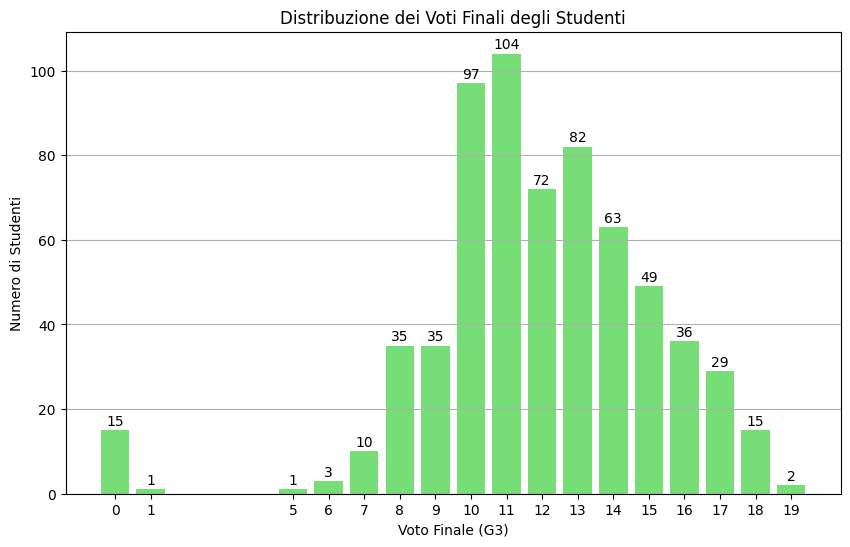

In [3]:
# Calculate the number of students for each distinctive grade
voti_distinti = sorted(por['G3'].unique())  # Ottieni i voti distinti e ordina
numero_studenti = por['G3'].value_counts().sort_index()  # Conta il numero di studenti per ciascun voto e ordina per voto

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(voti_distinti, numero_studenti, color='#77DD77')

for bar, count in zip(bars, numero_studenti):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, count,
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Voto Finale (G3)')
plt.ylabel('Numero di Studenti')
plt.title('Distribuzione dei Voti Finali degli Studenti')
plt.xticks(voti_distinti)
plt.grid(axis='y')
plt.show()

Binning della variabile 'G3' per rendere più leggibile l'andamento dei voti

In [4]:
bins = [0, 4, 8, 12, 16, 20]
labels = ['Ottimo' , 'Buono', 'Sufficiente', 'Mediocre', 'Scarso']

por['score_range'] = pd.cut(por['G3'], bins=bins, labels=labels, right=False)

# Calculate the percentage of students in each band
percentage_range = por['score_range'].value_counts(normalize=True) * 100
percentage_range = percentage_range.reindex(labels)

pal = sns.color_palette("RdYlGn", len(labels))

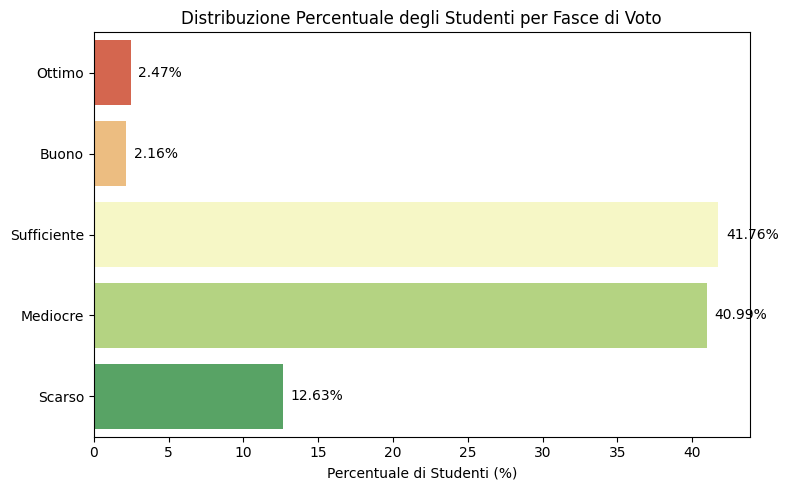

In [5]:
# Create plot
plt.figure(figsize=(8, 5))

sns.barplot(x=percentage_range.values, y=percentage_range.index, hue=percentage_range.index, palette=pal)

plt.xlabel('Percentuale di Studenti (%)')
plt.ylabel('')
plt.title('Distribuzione Percentuale degli Studenti per Fasce di Voto')

for i in range(len(percentage_range)):
    plt.text(percentage_range.values[i] + 0.5, i, f'{percentage_range.values[i]:.2f}%', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [6]:
por = por.drop(labels='score_range', axis=1)

<h3><a id="correlation">Final Score Correlation</a></h3>

Data la grande quantità di variabili categoriche, è stata effettuata un encoding di queste variabile, prima di generare la matrice di correlazione.

##### Data Encoding

In [7]:
por_enc = por.copy()

In [8]:
label_encoders = {}
onehot_encoders = {}
mapping = {}

In [9]:
categorical_columns = por_enc.select_dtypes(exclude=['number']).columns

categorical_binary_columns = []
categorical_not_binary_columns = []


for col in categorical_columns:
        if por_enc.nunique()[col] == 2:
                categorical_binary_columns.append(col)
        else:
               categorical_not_binary_columns.append(col)

In [10]:
# Encoding non-binary variables with OneHotEncoder and updating the mapping
for col in categorical_not_binary_columns:
    onehot_encoders[col] = OneHotEncoder(categories='auto', drop='if_binary')
    encoded_values = onehot_encoders[col].fit_transform(por_enc[[col]])
    encoded_df = pd.DataFrame(encoded_values.toarray(), columns=onehot_encoders[col].get_feature_names_out([col]))
    por_enc = pd.concat([por_enc, encoded_df], axis=1)
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(onehot_encoders[col].categories_[0])}

    por_enc.drop(columns=[col], inplace=True)

In [11]:
# Encoding binary variables with LabelEncoder and updating the mapping
for col in categorical_binary_columns:
    label_encoders[col] = LabelEncoder()
    por_enc[col] = label_encoders[col].fit_transform(por_enc[col])
    
    # Update the mapping
    mapping[col] = {i: cat for i, cat in enumerate(label_encoders[col].classes_)}

##### Final Score (G3) - Correlation

In [12]:
correlation_matrix = por_enc.corr()
g3_correlations_abs = correlation_matrix['G3'].abs().sort_values(ascending=False)

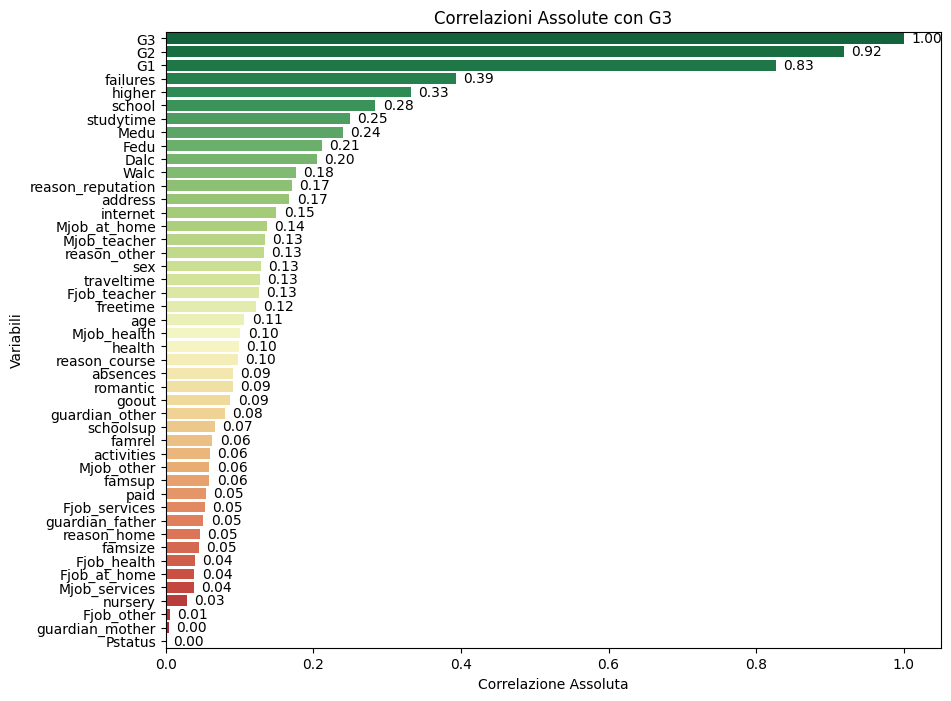

In [28]:
#Create plot
plt.figure(figsize=(10, 8))

palette = sns.color_palette("RdYlGn", len(g3_correlations_abs))

sns.barplot(x=g3_correlations_abs.values, y=g3_correlations_abs.index, hue=g3_correlations_abs.index, orient='h', palette=palette[::-1])
plt.title('Correlazioni Assolute con G3')
plt.xlabel('Correlazione Assoluta')
plt.ylabel('Variabili')

for i, v in enumerate(g3_correlations_abs):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.show()

<h3><a id="variables_analysis">Analisi dei fattori impattanti sul voto finale</a></h3>


<h5><a id="personal">Dati Anagrafici</a></h5>

In [29]:
print("Media voti per sesso\n ", por.groupby("sex")["G3"].mean())

Media voti per sesso
  sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


In [31]:
# Calculate your children's grade point average for each combination of age and gender
mean_scores = por.groupby(["age", "sex"])["G3"].mean().unstack()

# Calculate the number of students by age and gender
student_count = por.groupby(["age", "sex"]).size().unstack()

# Check for existence of NaN values ​​and replace them with 0
mean_scores = mean_scores.fillna(0)
student_count = student_count.fillna(0)

ages = mean_scores.index

In [32]:
# Create trace for bar graph
fig = go.Figure()

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['F'],
    name='F',
    marker_color='#FF6961',
    hoverinfo='y'
))

fig.add_trace(go.Bar(
    x=ages,
    y=mean_scores['M'],
    name='M',
    marker_color='#A2CFFE',
    hoverinfo='y'
))

# Create trace for the student distribution curves
fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['F'],
    name='Distr F',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='red'),
    hoverinfo='y'
))

fig.add_trace(go.Scatter(
    x=ages,
    y=student_count['M'],
    name='Dist M',
    yaxis='y2',
    mode='lines+markers',
    marker=dict(color='blue'),
    hoverinfo='y'
))

# Set i layout
fig.update_layout(
    title='Media voti e Distribuzione studenti per età e sesso',
    xaxis=dict(title='Età'),
    yaxis=dict(title='Media voti finali'),
    yaxis2=dict(title='n° studenti', overlaying='y', side='right'),
    barmode='group',
    hovermode='x',
    legend=dict(
        x=1.05,
        y=1
    )
)

# Mostra il grafico
fig.show()

In [53]:
def boxplot(columns):
    sns.set_theme(style="whitegrid")

    # Calculate the total number of subplots needed
    num_plots = len(columns)
    num_rows = (num_plots - 1) // 3 + 1 

    fig, axes = plt.subplots(num_rows, 3, figsize=(14, num_rows * 5))
    axes = axes.flatten()

    # Create boxplot for every columns
    for i, col in enumerate(columns):
        ax = axes[i]
        sns.boxplot(x=col, y='G3', data=por, ax=ax)
        ax.set_title(f'Distribuzione dei voti (G3) per {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('G3')

    # Remove any unused axes if the number of columns is not a multiple of 3
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

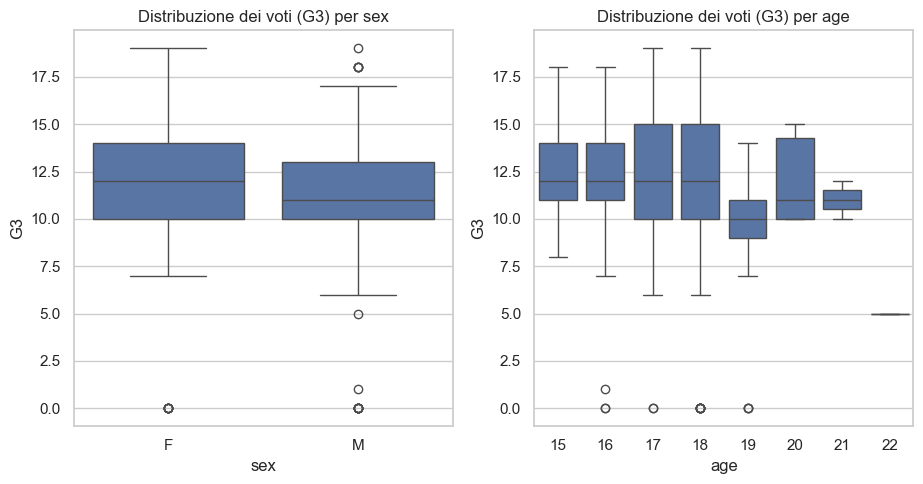

In [54]:
# Create boxplot for specific columns
boxplot_columns = ['sex', 'age'] 

boxplot(boxplot_columns)

<h5><a id="school">Istituti Scolastici</a></h5>

In [33]:
print("Istituti scolastici ", por.school.unique())

Istituti scolastici  ['GP' 'MS']


In [55]:
# grade point average by school
mean_by_school = por.groupby('school')['G3'].mean().reset_index(name='avg_sch')

print(mean_by_school)

  school    avg_sch
0     GP  12.576832
1     MS  10.650442


In [34]:
failed_students_per_school = por[por['failures'] > 1].groupby('school').size().reset_index(name='failed_students')

In [35]:
print(por.groupby('school').size().reset_index(name='counts'))

  school  counts
0     GP     423
1     MS     226


In [36]:
por.groupby('school')['G3'].mean().reset_index(name='avg_sch')

,school,avg_sch
0,GP,12.576832
1,MS,10.650442


In [37]:
# Percentage finale grade by failures by school

failed_students_per_school = por[por['failures'] > 1].groupby('school').size().reset_index(name='failed_students')
total_students_per_school = por.groupby('school').size().reset_index(name='total_students')


school_failures = pd.merge(total_students_per_school, failed_students_per_school, on='school', how='left')
school_failures['failed_students'] = school_failures['failed_students'].fillna(0)

school_failures['failure_percentage'] = (school_failures['failed_students'] / school_failures['total_students']) * 100

print(school_failures)

  school  total_students  failed_students  failure_percentage
0     GP             423               18            4.255319
1     MS             226               12            5.309735


In [39]:
# average number of students who want to continue their studies per school

higher_students = por[por['higher'] == 'yes']
mean_g3_higher = higher_students.groupby('school')['G3'].mean().reset_index(name='mean_G3_by_higher')

print(mean_g3_higher)

  school  mean_G3_by_higher
0     GP          12.861893
1     MS          11.063492


In [40]:
school_report = mean_by_school.merge(school_failures, on="school")
school_report = school_report.merge(mean_g3_higher, on="school")

school_report = school_report.drop(["total_students", "failed_students"], axis=1)
school_report = school_report.rename(columns={"school": "sch", "failure_percentage": "fail_per", "mean_G3_by_higher": "G3_higher"})

numeric_columns = school_report.select_dtypes(include=['float64']).columns
school_report[numeric_columns] = school_report[numeric_columns].round(2)

table = tabulate(school_report, headers='keys', tablefmt='github', showindex=False)

print(table)

| sch   |   avg_sch |   fail_per |   G3_higher |
|-------|-----------|------------|-------------|
| GP    |     12.58 |       4.26 |       12.86 |
| MS    |     10.65 |       5.31 |       11.06 |


In [ ]:
# Relationship between school choice and final grade plotly
mean_g3_by_reason = por.groupby(['school', 'reason'])['G3'].mean().unstack()

fig = go.Figure()

bar_width = 0.16 

for reason in mean_g3_by_reason.columns:
    fig.add_trace(go.Bar(
        x=mean_g3_by_reason.index,
        y=mean_g3_by_reason[reason],
        name=reason,
        width=[bar_width] * len(mean_g3_by_reason.index)  # Imposta la larghezza delle barre
    ))

fig.update_layout(
    title='Media dei voti finali rispetto al motivo della scelta della scuola',
    xaxis=dict(title='Scuola'),
    #yaxis=dict(title='Media dei voti finali'),
    barmode='group'
)

# Plot graph
fig.show()

In [56]:
por.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

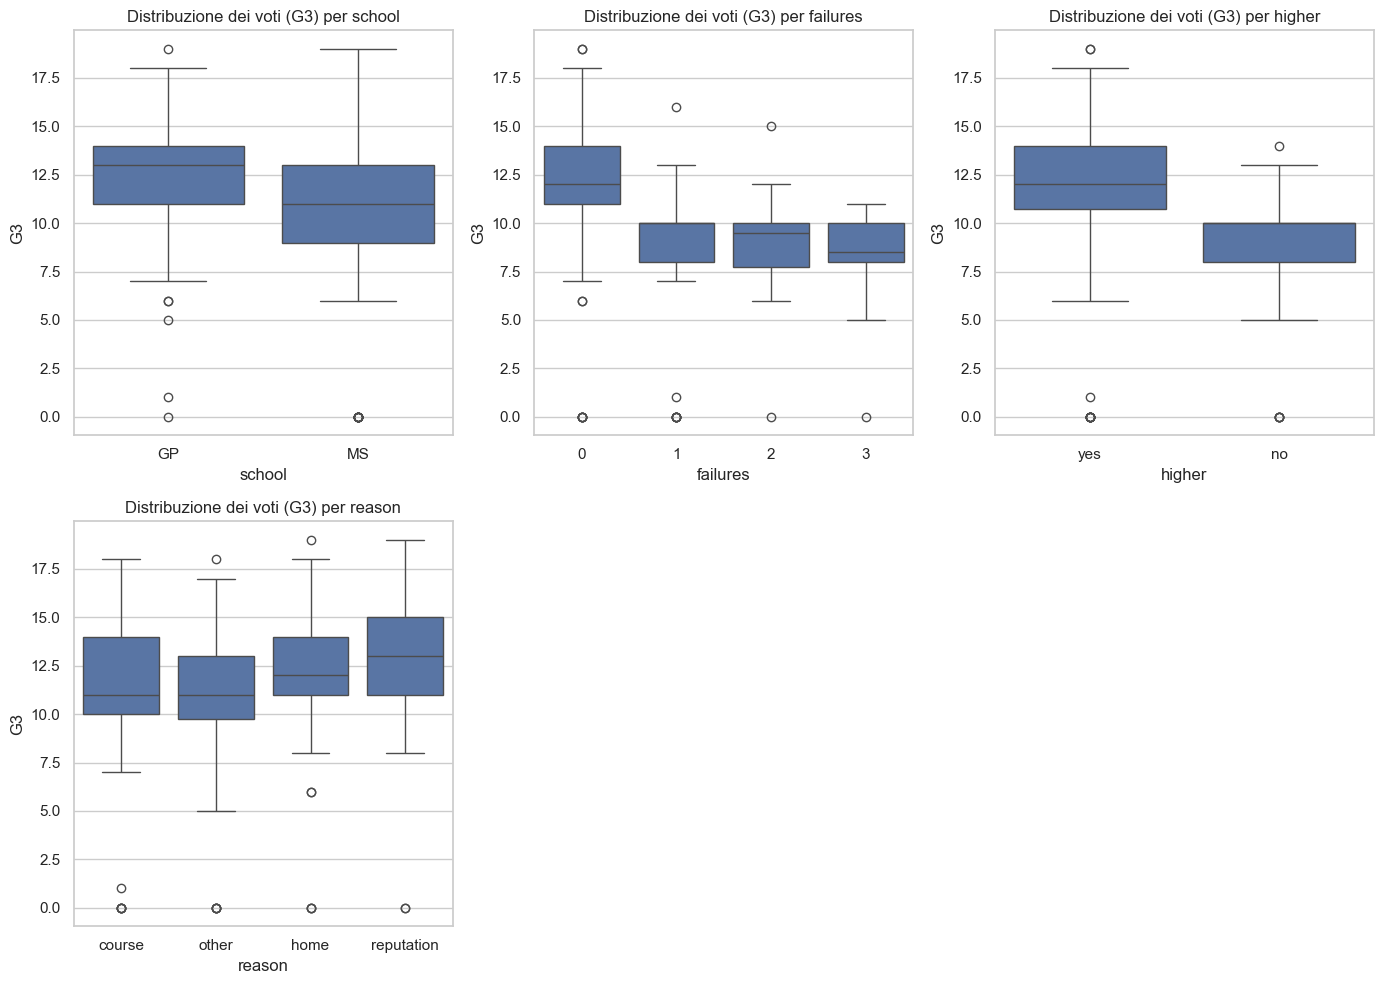

In [57]:
# Create boxplot for specific columns
boxplot_columns = ['school', 'failures', 'higher', 'reason', ] 

boxplot(boxplot_columns)

<h5><a id="family">Ambiente Familiare</a></h5>

In [ ]:
education_levels = np.arange(5)
fedu_mean = por.groupby('Fedu')['G3'].mean()
medu_mean = por.groupby('Medu')['G3'].mean()

bar_width = 0.25
index = np.arange(len(education_levels))

fig = go.Figure()

# Fedu bars
fig.add_trace(go.Bar(
    x=index - bar_width / 2,  # Spostamento per le barre
    y=fedu_mean,
    width=bar_width,
    name='Fedu',
    marker_color='#A2CFFE'
))

# Medu bars
fig.add_trace(go.Bar(
    x=index + bar_width / 2, 
    y=medu_mean,
    width=bar_width,
    name='Medu',
    marker_color='#FF6961'
))

# Plot layout
fig.update_layout(
    title="Andamento scolastico dei figli rispetto al livello d'istruzione dei genitori",
    xaxis_title="Livello d'istruzione dei genitori",
    yaxis_title="Media dei voti dei figli",
    xaxis=dict(
        tickvals=index,
        ticktext=[str(level) for level in education_levels],
        title="Livello d'istruzione dei genitori"
    ),
    barmode='group',
    legend_title="Tipo di Istruzione",
    width=700,
    height=450
)

# Settings bar's labels
for i in range(len(education_levels)):
    fig.add_annotation(
        x=index[i] - bar_width / 2,
        y=fedu_mean[i] + 0.1,
        text=f'{fedu_mean[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )
    fig.add_annotation(
        x=index[i] + bar_width / 2,
        y=medu_mean[i] + 0.1,
        text=f'{medu_mean[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )

fig.show()


In [ ]:
fjob_mean = por.groupby('Fjob')['G3'].mean()
mjob_mean = por.groupby('Mjob')['G3'].mean()

# Add 'other' as finally category
job_levels = sorted(por['Fjob'].unique())
if 'other' in job_levels:
    job_levels.remove('other')
    job_levels.append('other')

fjob_mean = fjob_mean.reindex(job_levels, fill_value=0) 
mjob_mean = mjob_mean.reindex(job_levels, fill_value=0)

bar_width = 0.25
index = np.arange(len(job_levels))

fig = go.Figure()

# Fjob bars
fig.add_trace(go.Bar(
    x=index - bar_width / 2,
    y=fjob_mean.values,
    width=bar_width,
    name='Fjob',
    marker_color='#A2CFFE'
))

# Mjob bars
fig.add_trace(go.Bar(
    x=index + bar_width / 2, 
    y=mjob_mean.values,
    width=bar_width,
    name='Mjob',
    marker_color='#FF6961'
))

# Plot layout
fig.update_layout(
    title="Andamento scolastico dei figli rispetto alla professione dei genitori",
    xaxis_title="Professione dei genitori",
    yaxis_title="Media dei voti dei figli",
    xaxis=dict(
        tickvals=index,
        ticktext=job_levels,
        title="Professione dei genitori"
    ),
    barmode='group',
    legend_title="Tipo di Professione", 
    width=750,
    height=500
)

# Settings bar's labels
for i in range(len(job_levels)):
    fig.add_annotation(
        x=index[i] - bar_width / 2,
        y=fjob_mean.iloc[i] + 0.1,
        text=f'{fjob_mean.iloc[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )
    fig.add_annotation(
        x=index[i] + bar_width / 2,
        y=mjob_mean.iloc[i] + 0.1,
        text=f'{mjob_mean.iloc[i]:.2f}',
        showarrow=False,
        font=dict(size=8, color='black')
    )

fig.show()


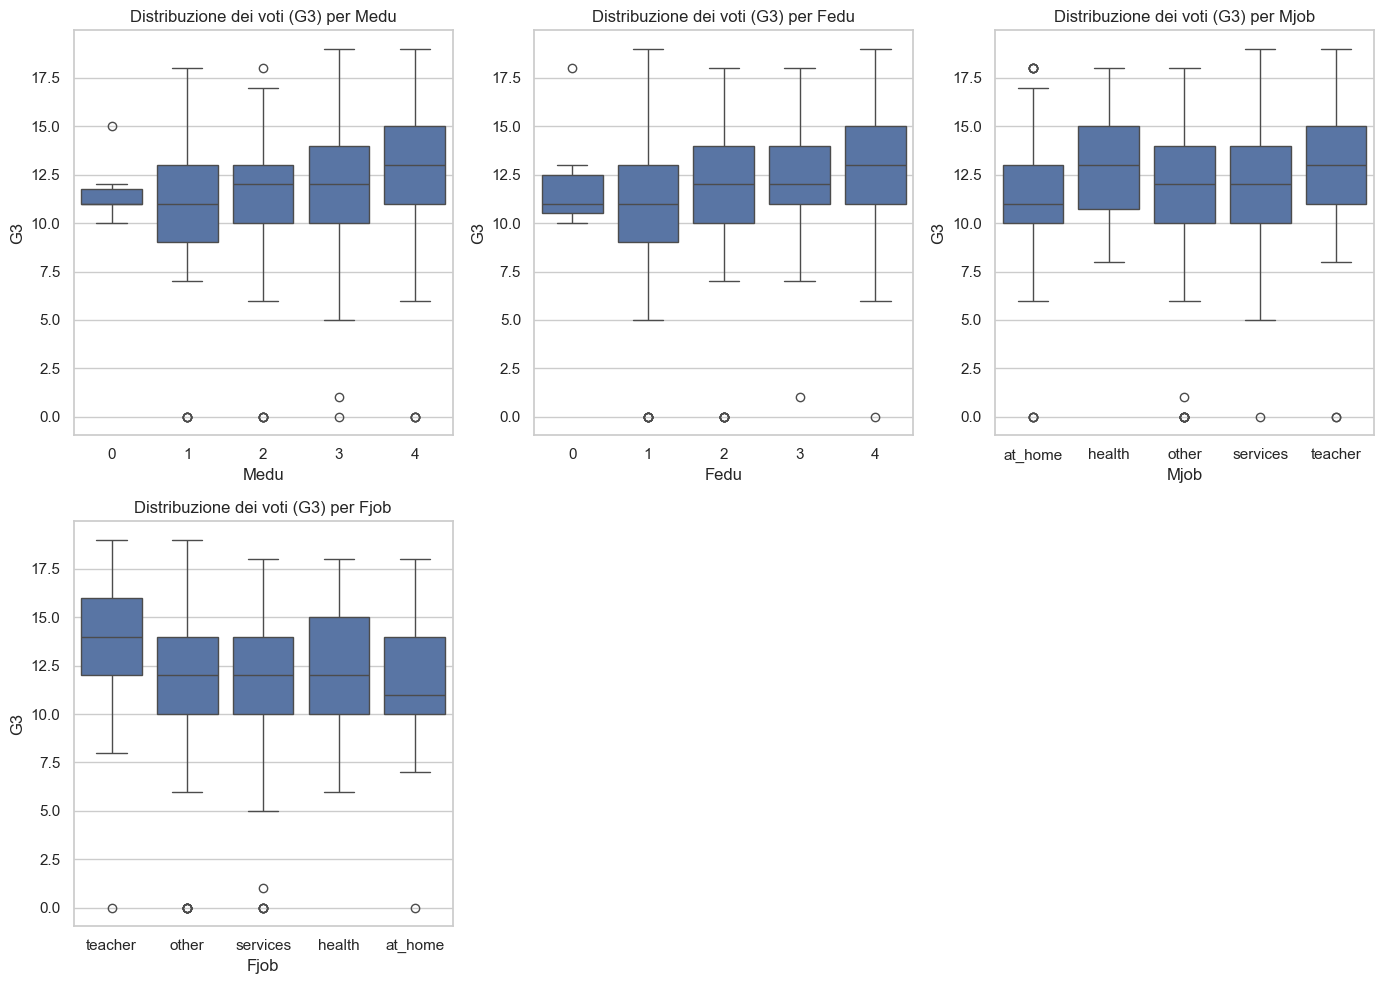

In [59]:
# Create boxplot for specific columns
boxplot_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob'] 

boxplot(boxplot_columns)

<h5><a id="time_management">Gestione del tempo</a></h5>


<p>
Questa sezione, illustra la relazione tra la gestione del tempo da parte degli studenti e il loro rendimento scolastico, misurato in termini di voto finale. 


Utilizzando quattro grafici a linee, sono state analizzate diverse categorie di gestione del tempo: 
<ul>
    <li>tempo dedicato allo studio (studytime)</li>
    <li>tragitto casa-scuola (traveltime)</li>
    <li>tempo libero (freetime)</li>
    <li>uscite con amici (goout)</li>
</ul>

</p>

In [ ]:
time_management_columns = ['studytime', 'traveltime', 'freetime', 'goout']

studytime_labels = ['<2 h', '2-5 h', '5-10 h', '>10 h']
traveltime_labels = ['<15 m', '15-30 m', '30 m-1 h', '>1 h']

# Create plot
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Media dei voti finali vs Studytime',
        'Media dei voti finali vs Traveltime',
        'Media dei voti finali vs Freetime',
        'Media dei voti finali vs Goout'
    ],
    horizontal_spacing=0.05, 
    vertical_spacing=0.08
)

axes_map = {
    'studytime': (1, 1),
    'traveltime': (1, 2),
    'freetime': (2, 1),
    'goout': (2, 2)
}

# Generate graphs for each time management column
for col in time_management_columns:
    mean_scores = por.groupby(col)["G3"].mean()
    labels = mean_scores.index

    if col == 'studytime':
        labels = studytime_labels
    elif col == 'traveltime':
        labels = traveltime_labels

    row, col_num = axes_map[col]

    fig.add_trace(go.Scatter(
        x=labels,
        y=mean_scores.values,
        mode='lines+markers',
        name=col.capitalize(),
        text=[f'Media: {val:.2f}' for val in mean_scores.values],
        hoverinfo='text+x'
    ), row=row, col=col_num)

fig.update_layout(
    #title='Media dei voti finali rispetto alla gestione del tempo',
    height=700,
    width=700,
    showlegend=False
)

# reduce font-size annotations
for annotation in fig['layout']['annotations']:
    annotation['font'] = {'size': 11} 

fig.show()


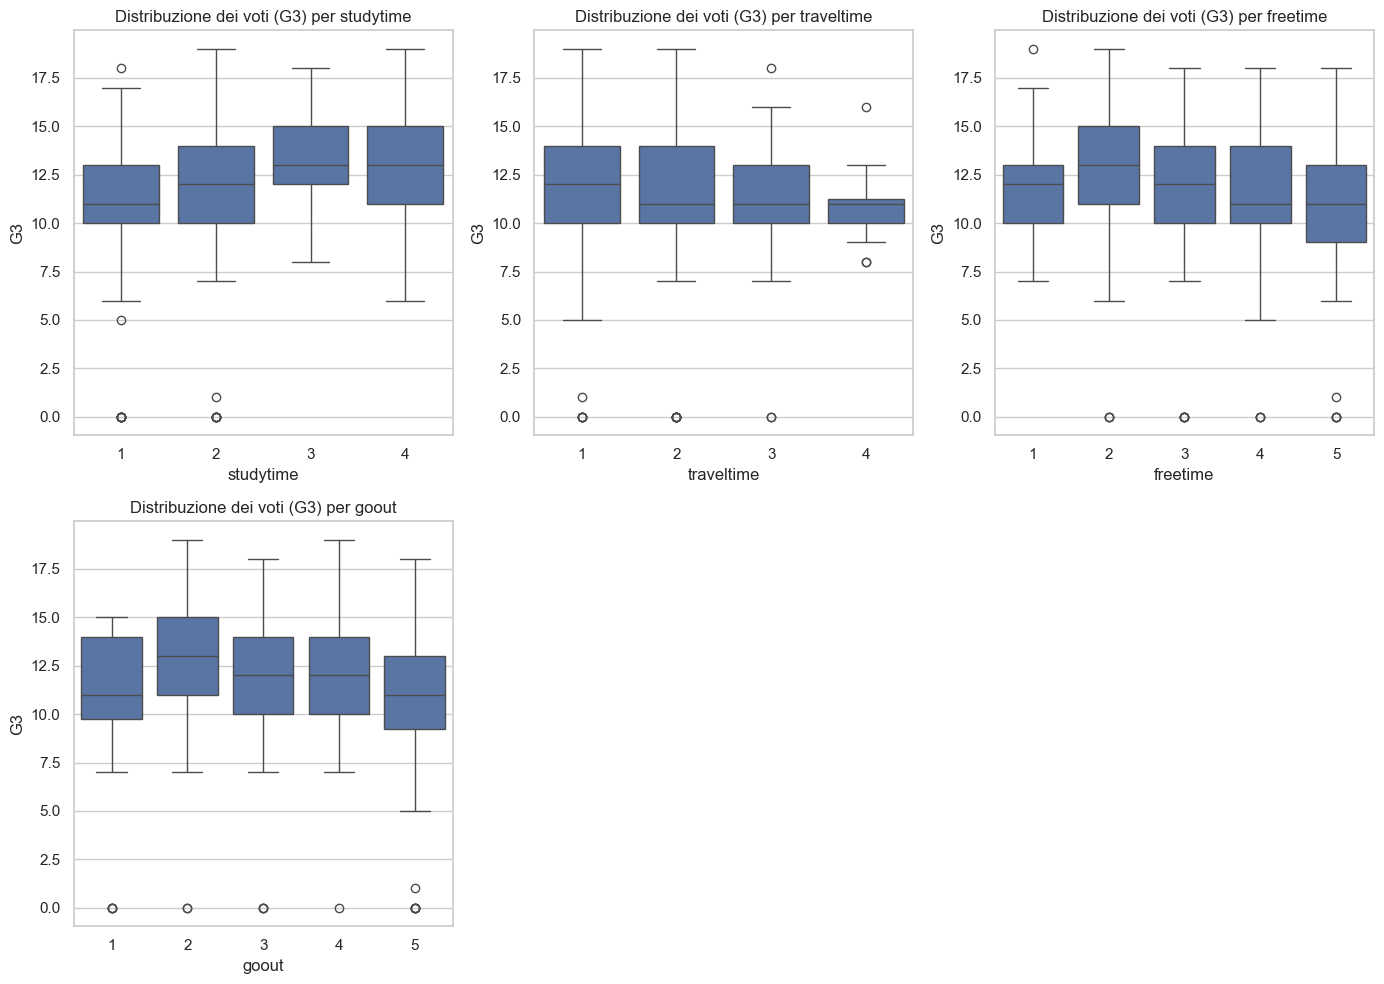

In [61]:
# Create boxplot for specific columns
boxplot_columns = ['studytime', 'traveltime', 'freetime', 'goout'] 

boxplot(boxplot_columns)

<h5><a id="alchol">Consumo di Alcolici</a></h5>

In [ ]:
# Calculate the average final grade for each level of alcohol consumption
dalc_mean = por.groupby('Dalc')['G3'].mean()
walc_mean = por.groupby('Walc')['G3'].mean()

bar_width = 0.35
index = np.arange(1, 6)

fig = go.Figure()

# Add bar for Dalc
fig.add_trace(go.Bar(
    x=index - bar_width/2,
    y=dalc_mean.values,
    name='Giorni Feriali',
    marker_color='#1E90FF',
    text=[f'{val:.2f}' for val in dalc_mean.values],
    textposition='outside'
))

# Add bar for Walc
fig.add_trace(go.Bar(
    x=index + bar_width/2,
    y=walc_mean.values,
    name='Week End',
    marker_color='#FF4500',
    text=[f'{val:.2f}' for val in walc_mean.values],
    textposition='outside'
))

fig.update_layout(
    title='Media dei voti finali rispetto al consumo di alcol',
    xaxis_title='Livello di consumo di alcol',
    yaxis_title='Media dei voti finali',
    xaxis=dict(
        tickvals=index,
        ticktext=index
    ),
    barmode='group',  # Barre parallele
    legend_title="Periodo"
)

fig.show()


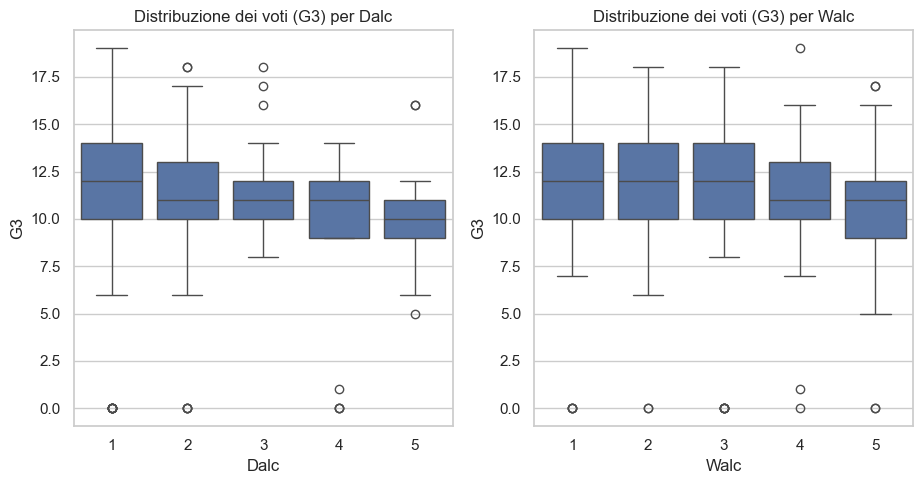

In [63]:
# Create boxplot for specific columns
boxplot_columns = ['Dalc', 'Walc'] 

boxplot(boxplot_columns)

<h5><a id="other_analysis">Ulteriori Analisi</a></h5>

In [67]:
# Variables of interest
binary_columns = ['internet', 'schoolsup', 'romantic', 'address']

# Generete mean of finale score for every binary variables
means = {col: por.groupby(col)['G3'].mean() for col in binary_columns}

bar_width = 0.2
index = np.arange(len(binary_columns))

fig = go.Figure()

colors = {
    'internet': ['#0b5394', '#9fc5e8'],
    'schoolsup': ['#ff9900', '#ffd966'],
    'romantic': ['#990000', '#e06666'],
    'address': ['#38761d', '#b6d7a8']
}

# Add bar for every binary variable
for i, col in enumerate(binary_columns):
    yes_mean = means[col].get('yes', means[col].get('U', np.nan))
    no_mean = means[col].get('no', means[col].get('R', np.nan))

    # Se la variabile è 'address', usa nomi personalizzati
    if col == 'address':
        yes_name = 'address - Urb'
        no_name = 'address - Rur'
    else:
        yes_name = f'{col} - y'
        no_name = f'{col} - n'

    # Barre per 'yes'
    fig.add_trace(go.Bar(
        x=[index[i] - bar_width / 2],
        y=[yes_mean],
        name=yes_name,
        marker_color=colors[col][0],
        text=[f'{yes_mean:.2f}'],
        textposition='outside',
        showlegend=True
    ))

    # Barre per 'no'
    fig.add_trace(go.Bar(
        x=[index[i] + bar_width / 2],
        y=[no_mean],
        name=no_name,
        marker_color=colors[col][1],
        text=[f'{no_mean:.2f}'],
        textposition='outside',
        showlegend=True
    ))

fig.update_layout(
    xaxis_title='Variabili',
    yaxis_title='Media dei voti finali',
    xaxis=dict(
        tickvals=index,
        ticktext=binary_columns
    ),
    barmode='group',  
    legend_title='Categorie',
    legend=dict(
        x=1.05,  
        y=1,
        traceorder='normal',  
        orientation='v',  
        bgcolor='#e0e0e0'  
    ),
    margin=dict(l=0, r=200, t=40, b=50)  # Aggiusta i margini per fare spazio alla legenda
)

fig.show()


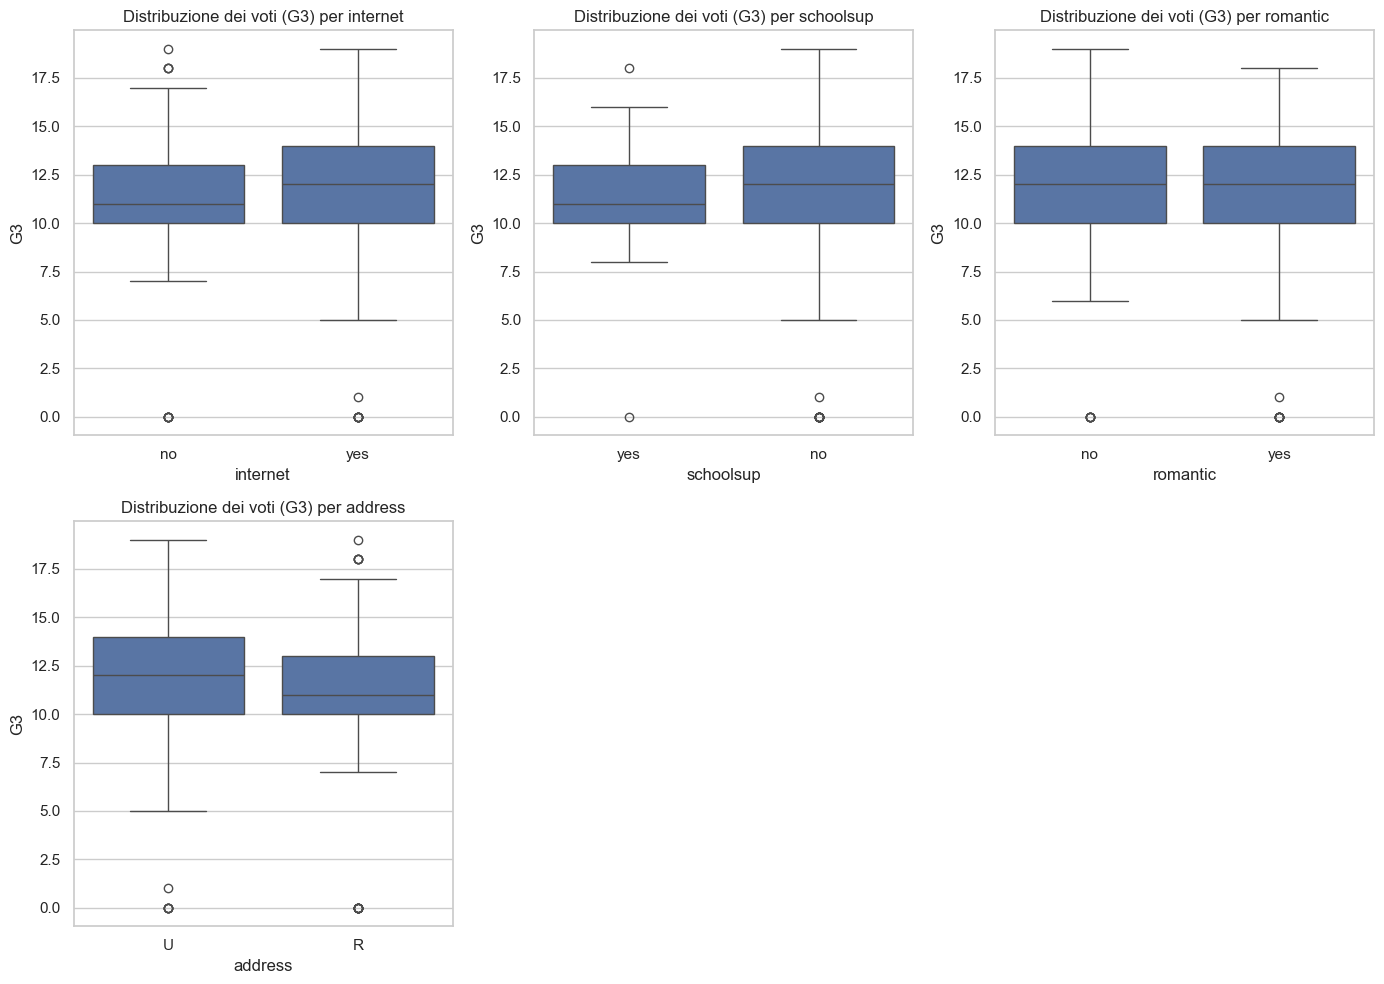

In [68]:
# Create boxplot for specific columns
boxplot(binary_columns)

<h1><a id="pa">Analisi Predittiva</a></h1>

<p>In questa fase indagheremo, tramite modelli di ML per l'apprendimento supervisionato, come predirre il voto finale (G3)</p>

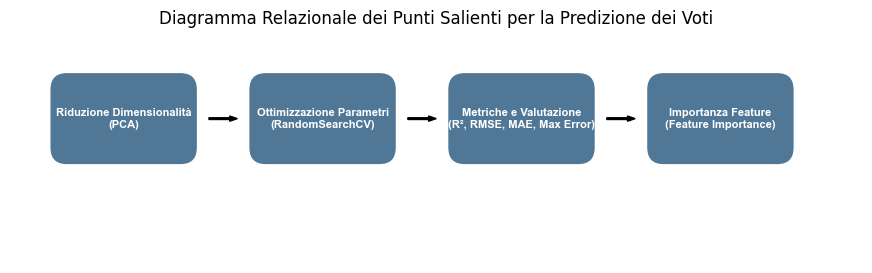

In [13]:
steps = [
    "Riduzione Dimensionalità\n(PCA)",
    "Ottimizzazione Parametri\n(RandomSearchCV)",
    "Metriche e Valutazione\n(R², RMSE, MAE, Max Error)",
    "Importanza Feature\n(Feature Importance)"
]

x = 0
y = 0
width = 2
height = 1
space = 1.5
arrow_space = 0.5

# Create fugure and axes
fig, ax = plt.subplots(figsize=(11, 3))
ax.set_xlim(-1, len(steps) * (width + space))
ax.set_ylim(-2, 2)
ax.axis('off')

# Add bocks and arrows
for i, step in enumerate(steps):
    box = FancyBboxPatch(
        (x + i * (width + space), y),
        width,
        height,
        boxstyle="round,pad=0.3",
        edgecolor='white',
        facecolor='#507796'
    )
    ax.add_patch(box)
    ax.text(
        x + i * (width + space) + width / 2,
        y + height / 2,
        step,
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        fontname='Arial',
        color='white'
    )
    if i < len(steps) - 1:
        arrow = FancyArrow(
            x + (i + 1) * (width + space) - space + arrow_space,  
            y + height / 2,
            space - 2 * arrow_space,
            0,
            width=0.03,
            length_includes_head=True,
            color='black'
        )
        ax.add_patch(arrow)

plt.title("Diagramma Relazionale dei Punti Salienti per la Predizione dei Voti", fontsize=12)
plt.show()


In [14]:
por_enc.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,16.744222,0.696456,0.295840,0.876733,2.514638,2.306626,1.568567,1.930663,...,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,0.476776,0.492187,1.218138,0.460143,0.456771,0.328996,1.134552,1.099931,0.748660,0.829510,...,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Per dimostrare l'efficacia di diversi algoritmi di machine learning nella previsione del voto finale, sono stati testati una gamma diversificata di modelli. Questo approccio didattico, ha permesso di:

- Apprendere come ogni algoritmo gestisce i dati e identifica le caratteristiche rilevanti

- Valutare le performance relative di ciascun modello, fornendo una comprensione pratica delle loro capacità e limitazioni

- Comprendere le differenze fondamentali tra gli algoritmi, facilitando la scelta del modello più adatto per previsioni accurate

<b>Algoritmi usati</b>

1. [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html): Algoritmo di regressione basato su Support Vector Machines. Efficace per dati di alta dimensione.

2. [GradientBoosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html): Metodo di ensemble che costruisce alberi sequenziali.
Alta accuratezza, ma richiede più tempo di addestramento.

3. [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html): Metodo di ensemble che combina multiple istanze dello stesso modello. Riduce la varianza e migliora la stabilità.

4. [RandomForest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): Algoritmo basato su ensemble di alberi decisionali.
Buona capacità di generalizzazione e gestione della variabilità nei dati.


5. [DecisionTree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): Algoritmo basato su alberi singoli. Facile interpretabilità, ma suscettibile all'overfitting.

6. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Modello di regressione lineare semplice. Base di confronto per valutare la complessità degli altri due modelli.

7. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html): Variante della regressione lineare che include una penalità. Migliora la generalizzazione riducendo l'overfitting.

8. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): Variante della regressione lineare che effettua selezione delle caratteristiche. Utile per ridurre il numero di feature rilevanti.

9. [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html): Modello di apprendimento profondo. Capacità di catturare pattern complessi nei dati, ma necessita di molti dati e tempo di addestramento.

10. [KNeighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html):Algoritmo di classificazione e regressione basato sulla vicinanza. Semplice da implementare, ma computationalmente costoso per dataset grandi.

In [15]:
# 1. Separation of features and target
X = por_enc.drop(columns=['G3'])
y = por_enc['G3']

<h3><a id="reduce_dim">Riduzione della Dimensionalità</a></h3>

In [16]:
# 2. Dimensionality Reduction

# Data normalization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

pca = PCA()
pca.fit(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

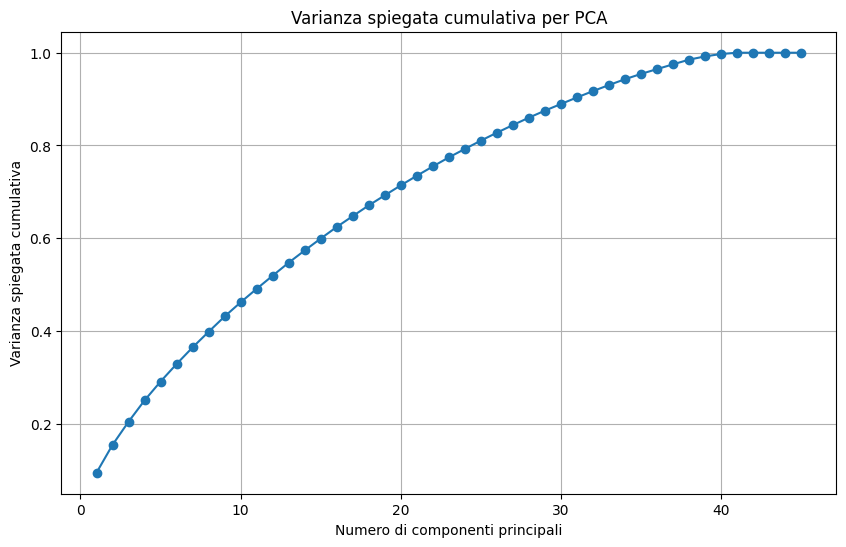

In [17]:
# Cumulative Explained Variance Plot for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Numero di componenti principali')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa per PCA')
plt.grid(True)
plt.show()


In [18]:
# Choose the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Numero di componenti principali per spiegare almeno il 95% della varianza: {num_components}")

# Dimensionality reduction with the optimal number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)


Numero di componenti principali per spiegare almeno il 95% della varianza: 35


In [19]:
# 3. Division of the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


<h3><a id="train">Ottimizzazione dei Parametri e Addestramento</a></h3>

Di seguito vengono riportati i range di valori che potranno assuere i parametri. 

Questi range verranno successivamente utilizzati dalla RandomizedSearchCV per trovare la combinazione ottimale di parametri per ciascun modello.

In [20]:
# 4. Optimization of the parameters of each model

# Definizione delle distribuzioni dei parametri

# SVR
param_dist_svr = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 0.1).rvs(10)),
    'epsilon': uniform(0.1, 1.0)
}

# Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3)
}

# Bagging
param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Decision Tree
param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Linear Regression
param_dist_lr = {}

# Ridge
param_dist_ridge = {
    'alpha': uniform(0.1, 10)
}

# Lasso
param_dist_lasso = {
    'alpha': np.logspace(-4, 4, 50)
}

# Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [2000, 3000, 4000] 
}

# KNN
param_dist_knn = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

##### Descrizione dei parametri per ciascun modello

<ul>
    <li>
    1. SVR (Support Vector Regression)
    C: Costante di regolarizzazione. Controlla la penalizzazione delle violazioni del margine. Un valore più alto di C significa meno tolleranza per gli errori.
    gamma: Parametro del kernel RBF. Influisce sulla forma della funzione decisionale. Valori più piccoli implicano una funzione decisionale più complessa.
    epsilon: Margine in cui non c'è penalità per l'errore. Controlla la larghezza del tubo epsilon-insensitive.
    </li>
    <li>
    2. Gradient Boosting
    n_estimators: Numero di alberi nel modello. Un valore più alto può migliorare la performance ma aumenta il rischio di overfitting.
    learning_rate: Riduce il contributo di ogni albero. Valori più bassi richiedono più alberi per una buona performance.
    max_depth: Profondità massima degli alberi individuali. Limita la crescita degli alberi per prevenire overfitting.
    min_samples_split: Numero minimo di campioni richiesti per dividere un nodo. Valori più alti riducono la complessità degli alberi.
    min_samples_leaf: Numero minimo di campioni che un nodo foglia deve avere. Simile a min_samples_split ma applicato ai nodi foglia.
    subsample: Frazione di campioni usati per allenare ogni albero. Aiuta a ridurre overfitting.
    </li>
    <li>
    3. Bagging
    n_estimators: Numero di alberi nel modello. Maggiore è il numero, maggiore è la stabilità e la robustezza del modello.
    max_samples: La frazione del dataset di training da usare per allenare ogni base learner.
    max_features: La frazione delle caratteristiche da considerare quando si cerca il miglior split.
    </li>
    <li>
    4. Random Forest
    n_estimators: Numero di alberi nella foresta.
    max_depth: Profondità massima degli alberi. Limita la profondità per prevenire overfitting.
    min_samples_split: Numero minimo di campioni richiesti per dividere un nodo.
    min_samples_leaf: Numero minimo di campioni che un nodo foglia deve avere.
    max_features: Numero massimo di caratteristiche da considerare per trovare il miglior split. 'sqrt' e 'log2' sono strategie comuni per selezionare sottoinsiemi di caratteristiche.
    </li>
    <li>
    5. Decision Tree
    max_depth: Profondità massima dell'albero.
    min_samples_split: Numero minimo di campioni richiesti per dividere un nodo.
    min_samples_leaf: Numero minimo di campioni che un nodo foglia deve avere.
    </li>
    <li>
    6. Linear Regression
    Nessun parametro iperparametro è elencato per la ricerca randomizzata, poiché la regressione lineare standard non ha parametri di tuning.
    </li>
    <li>
    7. Ridge
    alpha: Parametro di regolarizzazione. Un valore più alto comporta una maggiore penalizzazione dei coefficienti del modello.
    </li>
    <li>
    8. Lasso
    alpha: Parametro di regolarizzazione. Controlla la forza della penalizzazione L1, che può ridurre a zero alcuni coefficienti.
    </li>
    <li>
    9. Neural Network
    hidden_layer_sizes: Numero di unità in ciascun livello nascosto. Configura la struttura della rete neurale.
    activation: Funzione di attivazione per i livelli nascosti. 'tanh' e 'relu' sono scelte comuni.
    solver: Algoritmo per l'ottimizzazione del peso. 'sgd' e 'adam' sono opzioni comuni.
    alpha: Parametro di regolarizzazione L2.
    learning_rate: Strategia per aggiornare il peso. 'constant' mantiene un tasso di apprendimento fisso, mentre 'adaptive' lo modifica dinamicamente.
    max_iter: Numero massimo di iterazioni per l'allenamento.
    </li>
    <li>
    10. KNN (K-Nearest Neighbors)
    n_neighbors: Numero di vicini da considerare per fare le previsioni.
    weights: Funzione di peso usata nella previsione. 'uniform' assegna pesi uguali a tutti i vicini, mentre 'distance' assegna pesi in base alla distanza.
    metric: Metrica di distanza utilizzata per trovare i vicini. 'euclidean' e 'manhattan' sono scelte comuni.
    </li>
</ul>

In [21]:
# 5. Addestramento di ogni modello ottimizzato

# Definizione dei modelli
models = {
    'SVR': (SVR(kernel = 'rbf'), param_dist_svr),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_dist_gb),
    'Bagging': (BaggingRegressor(random_state=42), param_dist_bagging),    
    'RandomForest': (RandomForestRegressor(random_state=42), param_dist_rf),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_dist_dt),
    'LinearRegression': (LinearRegression(), param_dist_lr),
    'Ridge': (Ridge(), param_dist_ridge),
    'Lasso': (Lasso(random_state=42), param_dist_lasso),
    'NeuralNetwork': (MLPRegressor(max_iter=1000, random_state=42), param_dist_nn),
    'KNN': (KNeighborsRegressor(), param_dist_knn)
}


In [22]:
# RandomizedSearchCV of each model
random_searches = {}
training_times = {}

# Disabilitare temporaneamente i warning
warnings.filterwarnings("ignore", category=UserWarning)

for model_name, (model, param_dist) in models.items():
    try:
        print(f"Starting training for {model_name}")
        start_time = time.time()
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1, error_score='raise')
        random_search.fit(X_train, y_train)

        end_time = time.time()

        random_searches[model_name] = random_search
        training_times[model_name] = end_time - start_time

        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Training time for {model_name}: {training_times[model_name]:.2f} seconds")
        print("------")

    except UserWarning as e:
        print(f"A UserWarning occurred while training {model_name}: {e}")
    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

warnings.filterwarnings("default", category=UserWarning)

print("Training complete for all models.")

Starting training for SVR
Best parameters for SVR: {'C': np.float64(15.699452033620265), 'epsilon': np.float64(0.15808361216819947), 'gamma': np.float64(0.010699121359770691)}
Training time for SVR: 2.46 seconds
------
Starting training for GradientBoosting
Best parameters for GradientBoosting: {'learning_rate': np.float64(0.05286004537658223), 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 463, 'subsample': np.float64(0.7637017332034828)}
Training time for GradientBoosting: 24.99 seconds
------
Starting training for Bagging
Best parameters for Bagging: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0}
Training time for Bagging: 6.49 seconds
------
Starting training for RandomForest
Best parameters for RandomForest: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 84}
Training time for RandomForest: 6.20 seconds
------
Starting training for DecisionTree
Best parameters for DecisionTree: 


<h3><a id="valutation">Valutazione</a></h3>

In [23]:
# 6. Prediction and evaluation of each model

results = {}

# Loop attraverso ogni modello e calcolare le metriche
for model_name, search in random_searches.items():
    y_pred = search.best_estimator_.predict(X_test)

    # Calcolare le metriche
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    results[model_name] = {'R^2': round(r2, 2), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2), 'Max Err': round(max_err, 2)}

results_df = pd.DataFrame(results)
training_times_df = pd.Series(training_times, name="Train Time (s)")


results_df = results_df.T

final_results_df = results_df.join(training_times_df)

In [24]:
print(tabulate(final_results_df, headers='keys', tablefmt='github'))

|                  |   R^2 |   RMSE |   MAE |   Max Err |   Train Time (s) |
|------------------|-------|--------|-------|-----------|------------------|
| SVR              |  0.77 |   1.49 |  0.98 |      9.96 |        2.45916   |
| GradientBoosting |  0.69 |   1.74 |  1.22 |      7.51 |       24.9883    |
| Bagging          |  0.59 |   2.01 |  1.47 |      8.46 |        6.4928    |
| RandomForest     |  0.6  |   1.98 |  1.45 |      8.55 |        6.20445   |
| DecisionTree     |  0.45 |   2.32 |  1.76 |     10.26 |        0.158461  |
| LinearRegression |  0.8  |   1.41 |  0.96 |      9.99 |        0.0150208 |
| Ridge            |  0.8  |   1.4  |  0.95 |      9.94 |        0.175819  |
| Lasso            |  0.8  |   1.4  |  0.95 |      9.9  |        0.133505  |
| NeuralNetwork    |  0.71 |   1.67 |  1.19 |      9.44 |       19.4607    |
| KNN              |  0.48 |   2.24 |  1.69 |     10.37 |        0.0659368 |


<h3><a id="f_importance">Importanza delle features</a></h3>


In [ ]:
# 7. Visualizzazione dell'importanza delle feature

In [25]:
feature_labels = X_scaled.columns
feature_importances_dict = {}

In [26]:
# Extract feature importances for each model
for model_name, search in random_searches.items():
    if hasattr(search.best_estimator_, 'feature_importances_'):
        # For models that have the 'feature_importances_' attribute
        feature_importances_dict[model_name] = search.best_estimator_.feature_importances_
    elif hasattr(search.best_estimator_, 'coef_'):
        # For models that have the 'coef_' attribute (such as linear models)
        feature_importances_dict[model_name] = np.abs(search.best_estimator_.coef_)

# Creation of the Feature Importances DataFrame
# For models that use PCA, you need to map the principal component importances to the original features
def get_feature_importances_from_pca(pca, feature_importances_dict, original_feature_labels):
    component_loadings = pca.components_.T
    importance_dict = {}
    for model_name, importances in feature_importances_dict.items():
        if isinstance(importances, np.ndarray) and len(importances) == pca.n_components_:
            # Importances of the main components
            importances_matrix = np.dot(component_loadings, np.diag(importances))
            # Calculate the total importance for each feature
            feature_importances = np.abs(importances_matrix).sum(axis=1)
            importance_dict[model_name] = feature_importances
        else:
            # Models without importances or incompatible importances
            importance_dict[model_name] = np.nan * len(original_feature_labels)
    return pd.DataFrame(importance_dict, index=original_feature_labels)


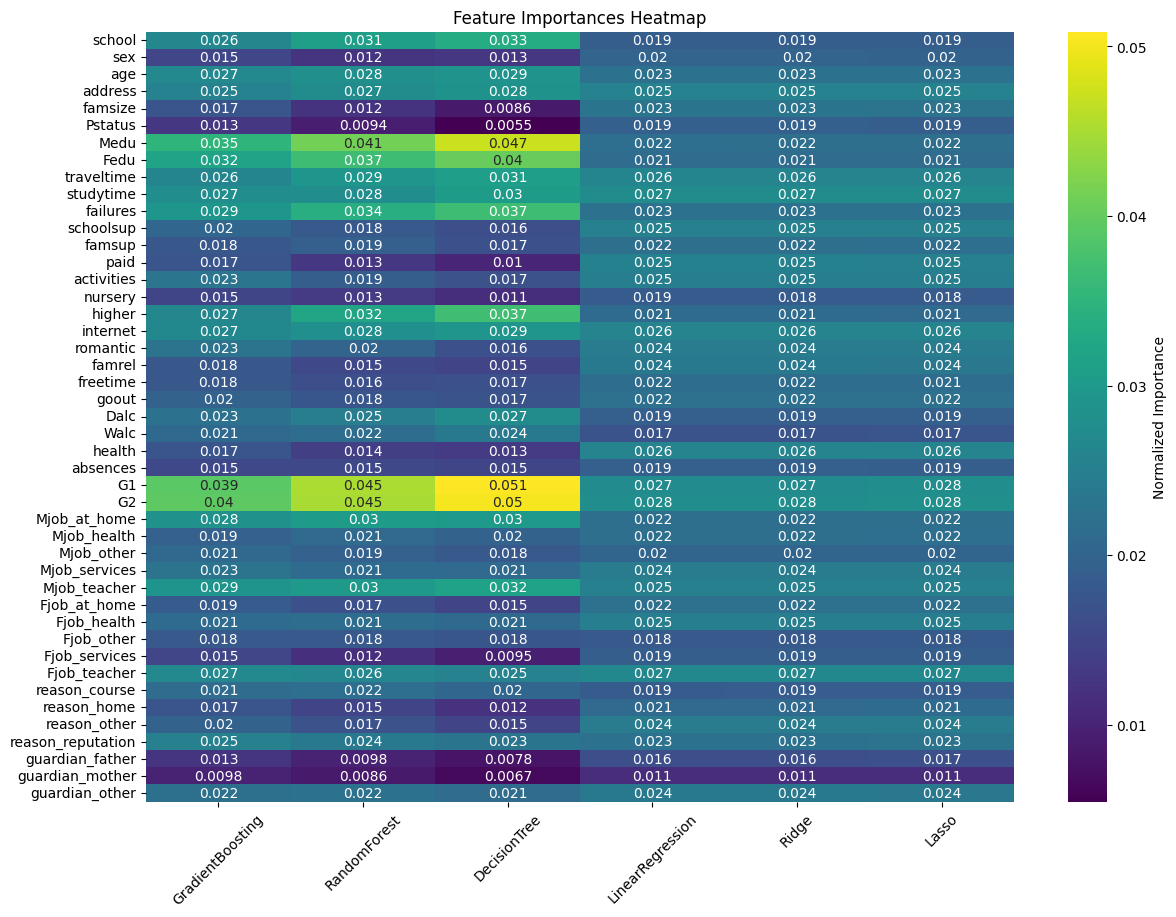

In [27]:
feature_importances_df = get_feature_importances_from_pca(pca, feature_importances_dict, feature_labels)

# Normalizzazione delle importanze delle feature (opzionale)
feature_importances_df = feature_importances_df.apply(lambda x: x / np.nansum(x), axis=0)

# Visualizzazione della heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Importance'})
plt.title('Feature Importances Heatmap')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)  # Ruota le etichette dei modelli per una migliore leggibilità
plt.show()

<h1>Web Bibliografy</h1>

2. Riduzione della dimensionalità

Normalization method: 

    [](https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1)

    [](https://www.datacamp.com/tutorial/normalization-in-machine-learning)

    [](https://www.geeksforgeeks.org/what-is-data-normalization/)

DimensionalityReduction Techniques
    
    [](https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c)

    [](https://medium.com/machine-learning-researcher/dimensionality-reduction-pca-and-lda-6be91734f567)


# 4. Ottimizzazione dei parametri di ogni modello

'''
Supervised ML regression algorithms

    https://www.onlinemanipal.com/blogs/popular-regression-algorithms-in-machine-learning

    https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

    https://www.geeksforgeeks.org/regression-in-machine-learning/



Parameter optimization machine learning models

    https://www.linkedin.com/pulse/machine-learning-optimization-techniques-bilal-el-jamal/

    https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
    
'''
'''
math explained 


Random forest:
    https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

Decision Tree:
    https://ankitnitjsr13.medium.com/math-behind-decision-tree-algorithm-2aa398561d6d

Gradient Boosting Regressor:
    https://medium.com/geekculture/gradient-boosting-for-regression-math-intuition-71f9a9826035#:~:text=Gradient%20Boosting%20starts%20by%20making,made%20by%20the%20previous%20tree.
    
SVR
    https://medium.com/@rahulrastogi1104/support-vector-regression-and-its-mathematical-implementation-b6377898cd74

Lasso & Ridge Regression
    https://medium.com/codex/mathematical-background-of-lasso-and-ridge-regression-23b74737c817

KNN


data binning: https://medium.com/@mose.kabungo/binning-explained-557aa3cce591